# Section 1: Business Understanding
- Question 1: How do StoreType and the number of stores, total sales, total customers, average sales, average spending per customer, and average number of customers per store relate to each other?
- Question 2: What is the assortments among all the StoreType? How do they distribute?
- Question 3: To what extent do promotions (Promo and Promo2) influence customer purchasing behavior in terms of sales?
- Question 4: Is there exist a trends on a yearly basis? How is that look like?
- Question 5: What about the Competition Distance and it kind of inpact does this have on the sales? 

# Section 2: Data Understanding

# 0. Import necessary libraries

In [1]:
# import the libraries we need for EDA:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use("ggplot") # make the plots to look nicer

# 1. Gather Data

I have download the dataset files from Kaggle directly on to my local machine and use the pandas library to read the file.

In [2]:
# import the training and test files:
train_df = pd.read_csv(r"C:\Users\ADMIN\Downloads\writing-a-data-scientist-blog-post\writing-a-data-scientist-blog-post\rossman dataset\rossman_train.csv")
store_df = pd.read_csv(r"C:\Users\ADMIN\Downloads\writing-a-data-scientist-blog-post\writing-a-data-scientist-blog-post\rossman dataset\rossman_store.csv")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\3899975728.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r"C:\Users\ADMIN\Downloads\writing-a-data-scientist-blog-post\writing-a-data-scientist-blog-post\rossman dataset\rossman_train.csv")


> The data is successfully read into this notebook

# 2. Assess Data

How many datas are in the files

In [3]:
#how many datas are in the files:
print("in the training set we have", train_df.shape[0], "observations and", train_df.shape[1], "columns/variables.")
print("in the store set we have", store_df.shape[0], "observations and", store_df.shape[1], "columns/variables.")

in the training set we have 1017209 observations and 9 columns/variables.
in the store set we have 1115 observations and 10 columns/variables.


> - In the training set we have 1017209 observations and 9 columns/variables.  > - Iin the store set we have 1115 observations and 10 columns/variables.


How does the data looks like

In [4]:
#how does the data looks like:
pd.concat([train_df.head(), train_df.tail()]) #show the first and last 5 rows.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


> This is quick brief view of the dataset as head and tail of it

Check for **missing value** of the dataset

In [5]:
# check missing values of store_df
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
# check missing values of train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


> **There are no missing value in rossman_train.csv and a few missing value in rossman_store.csv dataset** First, we going to check out each of the variables there are in each of the datasets. And then we will identify and process the data after the investigate section

# 3. Analyze

### rossman_train dataset analysis

Lets start with the first variable -> Sales

In [7]:
opened_sales = (train_df[(train_df.Open == 1) & (train_df.Sales)]) #if the stores are opend
opened_sales.Sales.describe()

count    422307.000000
mean       6951.782199
std        3101.768685
min         133.000000
25%        4853.000000
50%        6367.000000
75%        8355.000000
max       41551.000000
Name: Sales, dtype: float64

> The total number of open for business days at each store is 422,307 days. The mean for total sales at around 6,952. Median is at 6,367. Standard deviation is 3,101.768685. The minimum sales in a day is 133 and the maximum is 41,551. Q1 is 4,853 and Q3 is equal to 8,355. Below is the Histogram of variable Sales and Boxplot diagram.

Let check how the sales data distribution look like with the histogram and boxplot chart

<Axes: title={'center': 'Sales Boxplot'}>

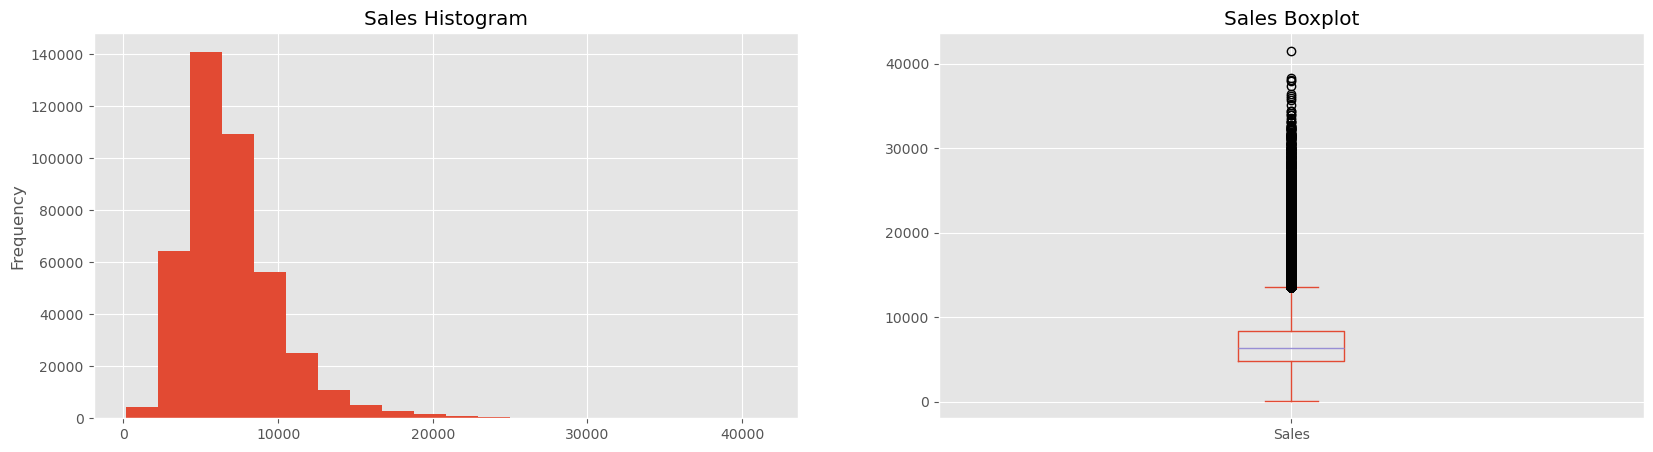

In [8]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

opened_sales.Sales.plot(kind = "hist", title = "Sales Histogram", bins = 20, ax = ax[0])
opened_sales.Sales.plot.box(title = "Sales Boxplot", ax = ax[1])

> The chart on the left is a histogram, which shows the distribution of the sales. The chart on the right is a box plot, which shows the spread of the sales data.
> - Histogram: The histogram shows that most of the sales fall between 10,000 and 20,000. There are also a few sales that were much higher or lower than this range.
> - Box Plot: The box plot confirms that most of the sales data is clustered below 15,000. The boxplot also shows that there were a few outliers, sales that were much higher or lower than the rest of the data.  
> In conclusion, the sales data appears to be right skewed. This means that there were a few sales that were much higher than the typical sale.

Let take the 10000 euro as a measure for profitable day of a store and less than 1000 is a bad working day for a store, let see how many of the record that is perform with this baseline

In [9]:
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales > 10000)].count() / opened_sales.shape[0] * 100, 2), 
      "% of the time big sales, over 10.000 Euros")
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales < 1000)].count() / opened_sales.shape[0] * 100, 4), 
      "% of the time low sales, under 1000 Euros")

Rossmann has 13.45 % of the time big sales, over 10.000 Euros
Rossmann has 0.0277 % of the time low sales, under 1000 Euros


> The conclusion is that:  
>
> - Rossmann has 13.45 % of the time big sales, over 10.000 Euros> - 
Rossmann has 0.0277 % of the time low sales, under 1000 Euro  
> Not that much of a bad performance store, and we have a lot of good performance on the overall sales days

The following is a brief description contains information of the Customers variable

In [10]:
train_df.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

> The total number of customers who have paid a visit to Rossman store for the last two and a half years is 1,017,209 customers. The mean for total customer at around 633. Median is at 609. Standard deviation is 464.4411. The minimum customer in a day is 0 and the maximum is 7,388. Q1 is 405 and Q3 is equal to 837. Below is the Histogram of variable Customers and Boxplot diagram.

Let check how the customer visit data distribution look like with the histogram and boxplot chart

<Axes: title={'center': 'Sales Boxplot'}>

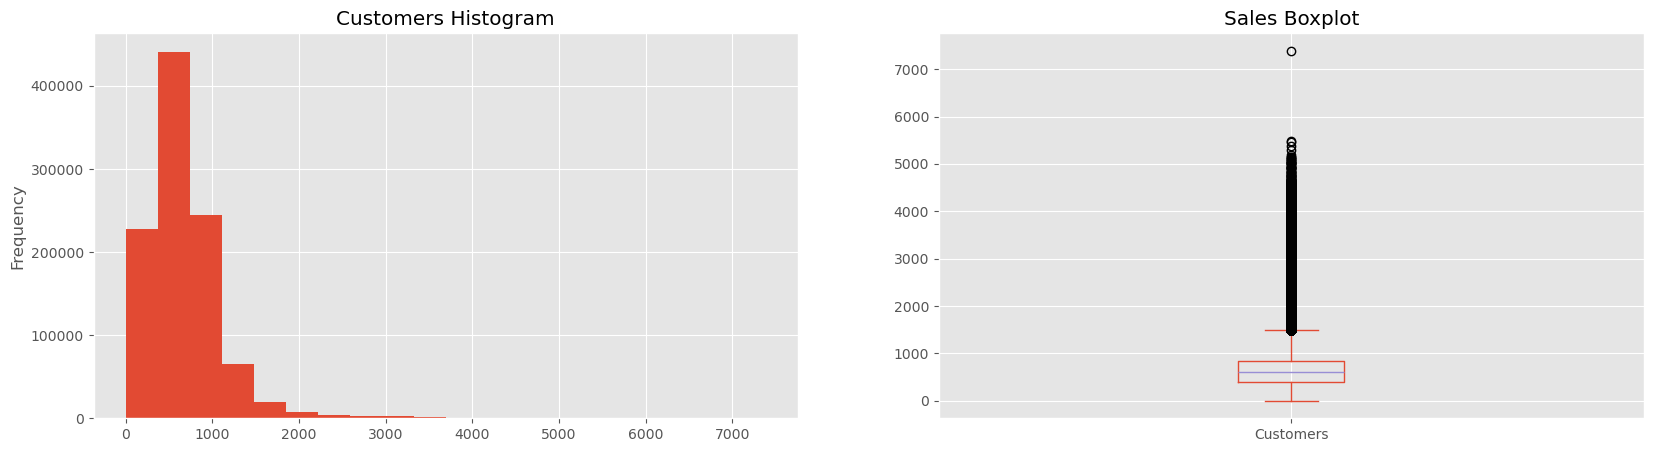

In [11]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

train_df.Customers.plot(kind = "hist", title = "Customers Histogram", bins = 20, ax = ax[0])
train_df.Customers.plot.box(title = "Sales Boxplot", ax = ax[1])


> The first chart is a histogram, which shows the distribution of the number of customers. The chart on the right is a boxplot, which shows the spread of the customer visit.
> - Histogram: The histogram shows that most of the stores have below 2000 customers for a day of a store. There are also a few stores that have many more customers than this.
> - Box Plot: The box plot confirms that most of the customer visit is spread below 1500 customers. The boxplot also shows that there were a few outliers.  
In conclusion, the number of customers data for these stores appears to be right skewed. This means that there are a few stores that have many more customers than the typical store.

Let check for the largest number of customer in a day

In [12]:
#check for the largest number of customer in a day
train_df[(train_df.Customers > 6000)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


> Seems to had a great sales on 22th of January 2013. They hit the record of customers. 

Lets look at the open variable

In [13]:
print("In 3 years, different stores where", train_df[(train_df.Open == 0)].count()[0], "times closed")
print("From this days,", train_df[(train_df.Open == 0) & 
         ((train_df.StateHoliday == "a") | 
         (train_df.StateHoliday == "b") | 
         (train_df.StateHoliday == "c"))].count()[0], "times the stores were closed because of holidays")
print(train_df[(train_df.Open == 0) & (train_df.SchoolHoliday == 1)].count()[0], "times, some stores were closed because of school holiday")
print("The stores were in some sundays opend ->", train_df[(train_df.Open == 1) & (train_df.DayOfWeek == 7)].count()[0], "times")
print("However,", train_df[(train_df.Open == 0) & ((train_df.StateHoliday == "0") | (train_df.StateHoliday == 0)) & (train_df.SchoolHoliday == 0)].count()[0], 
      "times, the stores were closed for no reason (No Holidays or Sunday)")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\1855777999.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("In 3 years, different stores where", train_df[(train_df.Open == 0)].count()[0], "times closed")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\1855777999.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("From this days,", train_df[(train_df.Open == 0) &
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\1855777999.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

In 3 years, different stores where 172817 times closed
From this days, 30140 times the stores were closed because of holidays
18264 times, some stores were closed because of school holiday
The stores were in some sundays opend -> 3593 times
However, 139610 times, the stores were closed for no reason (No Holidays or Sunday)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\1855777999.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("However,", train_df[(train_df.Open == 0) & ((train_df.StateHoliday == "0") | (train_df.StateHoliday == 0)) & (train_df.SchoolHoliday == 0)].count()[0],


>In 3 years, different stores where 172817 times closed
From this days, 30140 times the stores were closed because of holidays
18264 times, some stores were closed because of school holiday
The stores were in some sundays opend -> 3593 times
However, 139610 times, the stores were closed for no reason (No Holidays or Sun
>Rossman described clearly, that they were undergoing refurbishments sometimes and had to close. 
Most probably those were the times this event was happening. day)

What about Promotion?

In [14]:
print(round((train_df.Promo[train_df.Promo == 1].count() / train_df.shape[0] * 100), 2), "% of the time, has been promotions made")

38.15 % of the time, has been promotions made


> 38.15 % of the time, has been promotions made


Now lets take a look at StateHoliday Variable.

In [15]:
# StateHoliday is not a continous number. 
train_df.StateHoliday.value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

> There are different StateHoliday that get classified as a,b,c; and there are 0 as number and 0 as a string

StateHoliday is a string and it not important to know what kind of holiday (a, b or c). So we will convert it into 0 and 1, by creating a new variable.

In [16]:
# Transform the StateHoliday variable 
train_df["StateHoliday_cat"] = train_df["StateHoliday"].map({0:0, "0": 0, "a": 1, "b": 1, "c": 1})
train_df.StateHoliday_cat.count()

1017209

> We have the total of 1017209 StateHoliday count in the dataset

Get rid of the StateHoliday column and use only the new one.

In [17]:
# Remove the old StateHoliday column
train_df = train_df.drop("StateHoliday", axis = 1)
train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_cat
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1
1017208,1115,2,2013-01-01,0,0,0,0,1,1


Delete the times, where the stores were opened with no sales because of days in inventory.

In [18]:
# delete the times
train_df = train_df.drop(train_df[(train_df.Open == 0) & (train_df.Sales == 0)].index)
train_df = train_df.reset_index(drop = True) # to ge the indexes back to 0, 1, 2,etc.

train_df.isnull().all() #to check for NaNs

Store               False
DayOfWeek           False
Date                False
Sales               False
Customers           False
Open                False
Promo               False
SchoolHoliday       False
StateHoliday_cat    False
dtype: bool

> Recheck the train_df to make sure there are still no null value in train_df

### rossman_store dataset analysis

Check for the head and tail of the store_df 

In [19]:
pd.concat([store_df.head(),store_df.tail()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


> There seem to be a lot of null value in this dataset, in which we will process it

# Section 3: Data Preparation

## Missing value

How may missing data do we have in %:

In [20]:
# check out the % of missing value
100- (store_df.count() / store_df.shape[0] * 100)

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

> There are nearly half of missing value in columns Promo2SinceWeek, Promo2SinceYear and PromoInterval, and 1/3 data in CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns.
> Missing value columns:
> - Promo2SinceWeek
> - Promo2SinceYear
> - PromoInterval
> - CompetitionOpenSinceMonth
> - CompetitionOpenSinceYear

Lets start with each of the missing data column. The first one is **CompetitionDistance**. Let see the outliers, so we can choose between mean and median to fill the NaNs

the median is 2325.0 and mean is 5404.901079136691


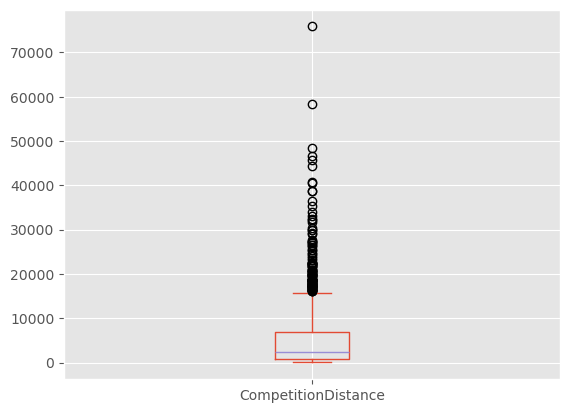

In [21]:
# check out the outliers
store_df.CompetitionDistance.plot.box() 
print("the median is", store_df.CompetitionDistance.median(), "and mean is", store_df.CompetitionDistance.mean())

> Since we have here some outlier, its better to input the median value to those few missing values.


Add the median value into missing value

In [22]:
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace = True)

> Filled successfully

Next is **CompetitionOpenSinceMonth** and **CompetitionOpenSinceYear**. The missing values, are not there, because the stores had no competition. So we would suggest to fill the missing values with zeros.

In [23]:
# Fill the missing values with zeros.
store_df["CompetitionOpenSinceMonth"].fillna(0, inplace = True)
store_df["CompetitionOpenSinceYear"].fillna(0, inplace = True)

> Filled successfully

Let's look at the **Promo2SinceWeek**, **Promo2SinceYear** and **PromoInterval**.

In [24]:
store_df.groupby(by = "Promo2", axis = 0).count() 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\3930996327.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  store_df.groupby(by = "Promo2", axis = 0).count()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Promo2,,,,,,,,,
0,544,544,544,544,544,544,0,0,0
1,571,571,571,571,571,571,571,571,571


> Because there are no data for the store that not participate in the Promo2, and we have to fill the missing value with some data. I will personally chose the 0 which will act as a placeholder when training the data. 

In [25]:
store_df["Promo2SinceWeek"].fillna(0, inplace = True)
store_df["Promo2SinceYear"].fillna(0, inplace = True)
store_df["PromoInterval"].fillna(0, inplace = True)

store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


> Filled successfully

Now lets merge the files: stores and training, so we can go on with our analysis.

In [26]:
train_store_df = pd.merge(train_df, store_df, how = "left", on = "Store")
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Open                       844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   SchoolHoliday              844392 non-null  int64  
 8   StateHoliday_cat           844392 non-null  int64  
 9   StoreType                  844392 non-null  object 
 10  Assortment                 844392 non-null  object 
 11  CompetitionDistance        844392 non-null  float64
 12  CompetitionOpenSinceMonth  844392 non-null  float64
 13  CompetitionOpenSinceYear   84

> It appear to be no null value in this dataset

Change the format of columns for suitable further analyzing

In [27]:
# train_store_df["Promo"] = train_store_df["Promo"].astype("category") # it's already numerica
# train_store_df["SchoolHoliday"] = train_store_df["SchoolHoliday"].astype("category") # it's already numerica
train_store_df["StoreType"] = train_store_df["StoreType"].astype("category")
train_store_df["Assortment"] = train_store_df["Assortment"].astype("category")
# train_store_df["Promo2"] = train_store_df["Promo2"].astype("category") # it's already numerica
train_store_df["PromoInterval"] = train_store_df["PromoInterval"].astype("category")

train_store_df["StoreType_cat"] = train_store_df["StoreType"].cat.codes
train_store_df["Assortment_cat"] = train_store_df["Assortment"].cat.codes
train_store_df["PromoInterval_cat"] = train_store_df["Assortment"].cat.codes

train_store_df["StateHoliday_cat"] = train_store_df["StateHoliday_cat"].astype("float")
train_store_df["StoreType_cat"] = train_store_df["StoreType_cat"].astype("float")
train_store_df["Assortment_cat"] = train_store_df["Assortment_cat"].astype("float")
train_store_df["PromoInterval_cat"] = train_store_df["PromoInterval_cat"].astype("float")

**Changes and Explanations**  

Convert Columns to category Type: StoreType, Assortment, PromoInterval
> Why: These columns contain categorical data, which benefits from being converted to a category type in pandas. This reduces memory usage and improves performance during analysis.

Encode Categorical Columns: StoreType_cat, Assortment_cat, PromoInterval_cat
> Why: Categorical variables are encoded into numerical codes. This is necessary for machine learning models, which typically require numerical input. It also helps in feature analysis.

Convert Encoded Columns to float: StateHoliday_cat, StoreType_cat, Assortment_cat, PromoInterval_cat
> Why: Converting these encoded columns to float ensures compatibility with algorithms that might expect float inputs. It can also prevent issues during data processing where data types need to be consistent.

These transformations prepare the data for machine learning and analysis by encoding categorical variables, optimizing memory usage, and ensuring data type consistency. This makes the dataset more suitable for algorithms that work with numerical data, enhancing model performance and analysis efficiency.

In [28]:
# check the change metadata
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Store                      844392 non-null  int64   
 1   DayOfWeek                  844392 non-null  int64   
 2   Date                       844392 non-null  object  
 3   Sales                      844392 non-null  int64   
 4   Customers                  844392 non-null  int64   
 5   Open                       844392 non-null  int64   
 6   Promo                      844392 non-null  int64   
 7   SchoolHoliday              844392 non-null  int64   
 8   StateHoliday_cat           844392 non-null  float64 
 9   StoreType                  844392 non-null  category
 10  Assortment                 844392 non-null  category
 11  CompetitionDistance        844392 non-null  float64 
 12  CompetitionOpenSinceMonth  844392 non-null  float64 
 13  CompetitionOpe

> The dataset is updated successfully

### Exploratory Data Analysis

### Question 1: How do StoreType and the number of stores, total sales, total customers, average sales, average spending per customer, and average number of customers per store relate to each other?

Calculate the Average Customer Sales with the available data from Customer and Sales attributes. We will name it “Avg_Customer_Sales”

In [29]:
train_store_df["Avg_Customer_Sales"] = train_store_df.Sales / train_store_df.Customers

> The average customer sales is a basic metric use in retail so I just calculate it base on the availiable data

Plot the variables: Number of Store, Total Sales, Total Customers, Average Sales, Average Spending per Customer, Average Customer, plotting by dimension of StoreType. I chose to focus on the StoreType because that is the variable that Rossmann could directly control and adjust, and all of the other variables is the concern variables that the company need to pay attention to. Say like they could change the StoreType to optimize those number

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\1695863818.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_store_df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\1695863818.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_store_df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\1695863818.py:6: FutureWarning: The default of observed=False is deprecated and

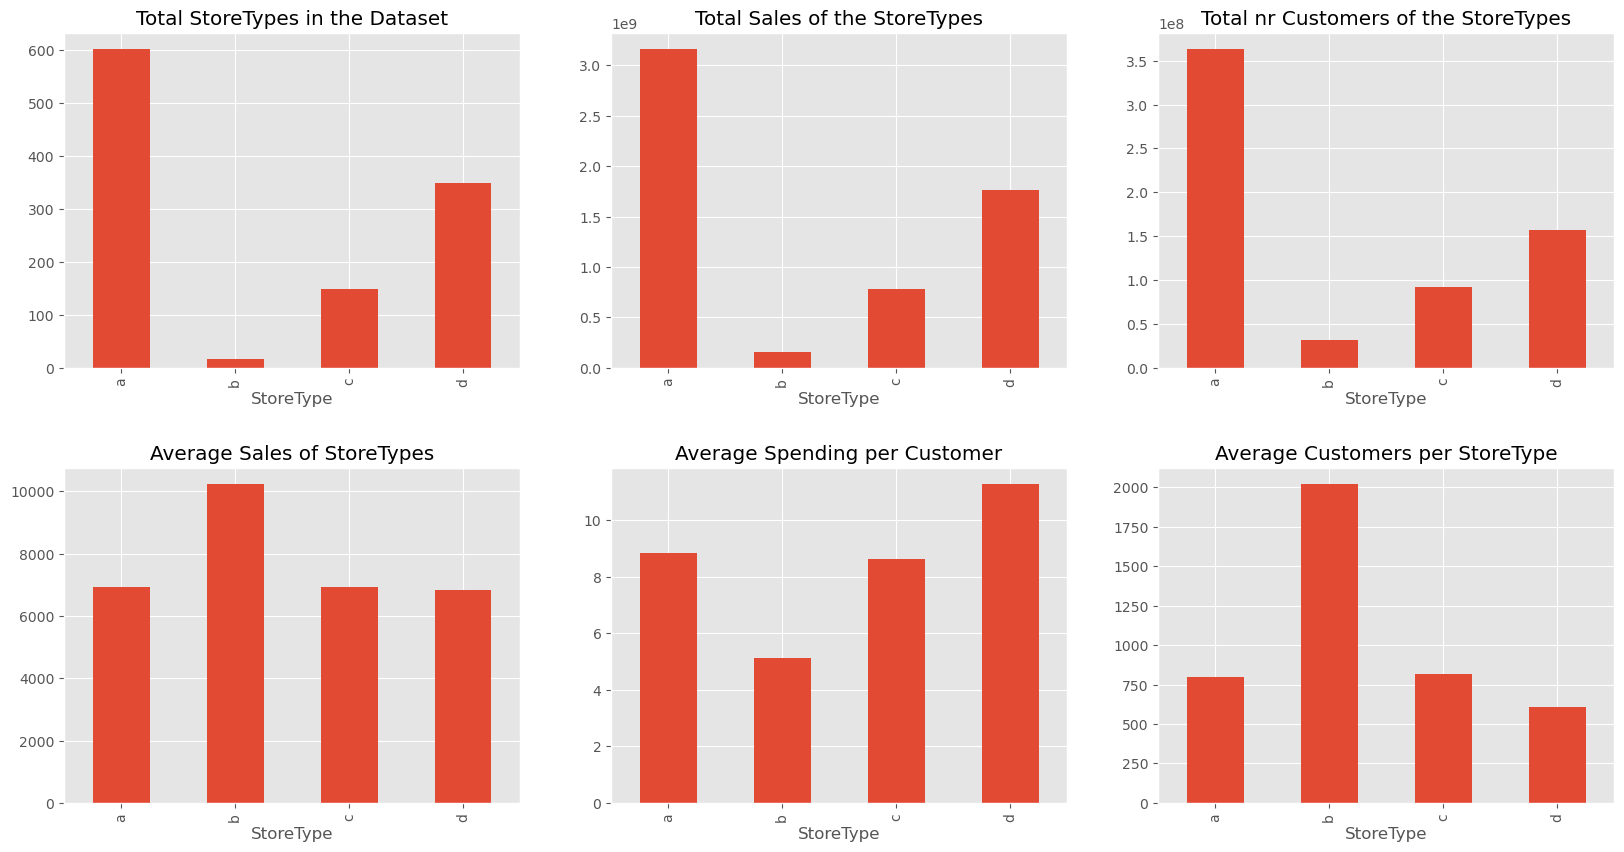

In [30]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
train_store_df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
train_store_df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
train_store_df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
train_store_df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
train_store_df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

> The charts above illustrate each attribute (Sales, Customers, Average Sales, Average Spending and Average Customers) according to each StoreTypes. As wecanobserve, here are some conclusions that could be extracted from the graphs:
> - Store type A has the most stores, sales and customers.
> - Store type D has the best averages spendings per customer.
> - Store type B, with only 17 stores (is the least number type of store
> - b assortment is extremely low compared to other assortments), has the most average customersand most average sales per store.  
> - The majority of the stores, almost 54%, are type A stores. The same goes withthetotal sales and customers, type A store dominant the number, occupied withmoreover than half of the sales and customers.
> - The number of average sales and customers of store type AandCareapproximately coordinated, which could give an insight indicated the similarityofthese two types of store.

### Question 2: What is the assortments among all the StoreType? How do they distribute?

Lets check the Assortments

# WHEN HERE IS STILL WORKING

In [31]:
# train_store_df["Promo"] = train_store_df["Promo"].astype("category") # it's already numerica
# train_store_df["SchoolHoliday"] = train_store_df["SchoolHoliday"].astype("category") # it's already numerica
train_store_df["StoreType"] = train_store_df["StoreType"].astype("category")
train_store_df["Assortment"] = train_store_df["Assortment"].astype("category")
# train_store_df["Promo2"] = train_store_df["Promo2"].astype("category") # it's already numerica
train_store_df["PromoInterval"] = train_store_df["PromoInterval"].astype("category")

train_store_df["StoreType_cat"] = train_store_df["StoreType"].cat.codes
train_store_df["Assortment_cat"] = train_store_df["Assortment"].cat.codes
train_store_df["PromoInterval_cat"] = train_store_df["Assortment"].cat.codes

train_store_df["StateHoliday_cat"] = train_store_df["StateHoliday_cat"].astype("float")
train_store_df["StoreType_cat"] = train_store_df["StoreType_cat"].astype("float")
train_store_df["Assortment_cat"] = train_store_df["Assortment_cat"].astype("float")
train_store_df["PromoInterval_cat"] = train_store_df["PromoInterval_cat"].astype("float")

E:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


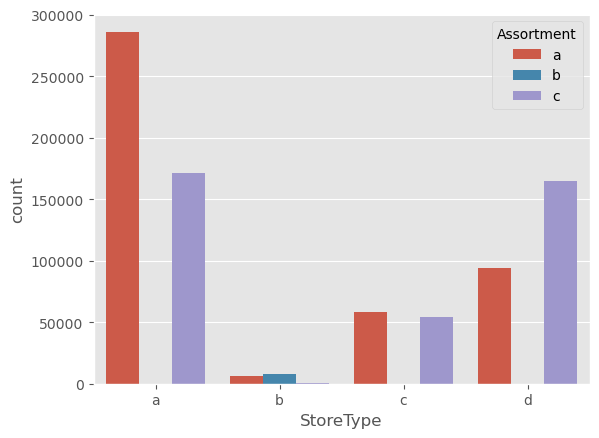

In [32]:
sns.countplot(data = train_store_df, x = "StoreType", hue = "Assortment", order=["a","b","c","d"]) 
plt.show()

> Only StoreType B has all assortments. That could be a suggestion to figure out why they are performing so good (could it be this StoreType has more sales area as related to the name “extend”). Assortment C is a good one, because StoreType D has the best average customer spending. The majority of the stores have type A assortments, other types of assortments are low (except for StoreType D).

### Question 3: To what extent do promotions (Promo and Promo2) influence customer purchasing behavior in terms of sales?  

First, we should exam whether promotions have influenced over the customers behavior by increasing their purchase. We could observe the effect by separate sales on days that have promotion and days that didn’t. Which type of promotions maintain a higher impact on customers (Promo or Promo2). And split the data into three separate periods, each period contains a year of information, to exam whether or not the data have seasonality frequency.

In [33]:
train_store_df.Date = train_store_df.Date.astype("datetime64[ns]")

train_store_df["Month"] = train_store_df.Date.dt.month
train_store_df["Year"] = train_store_df.Date.dt.year
train_store_df["Day"] = train_store_df.Date.dt.day

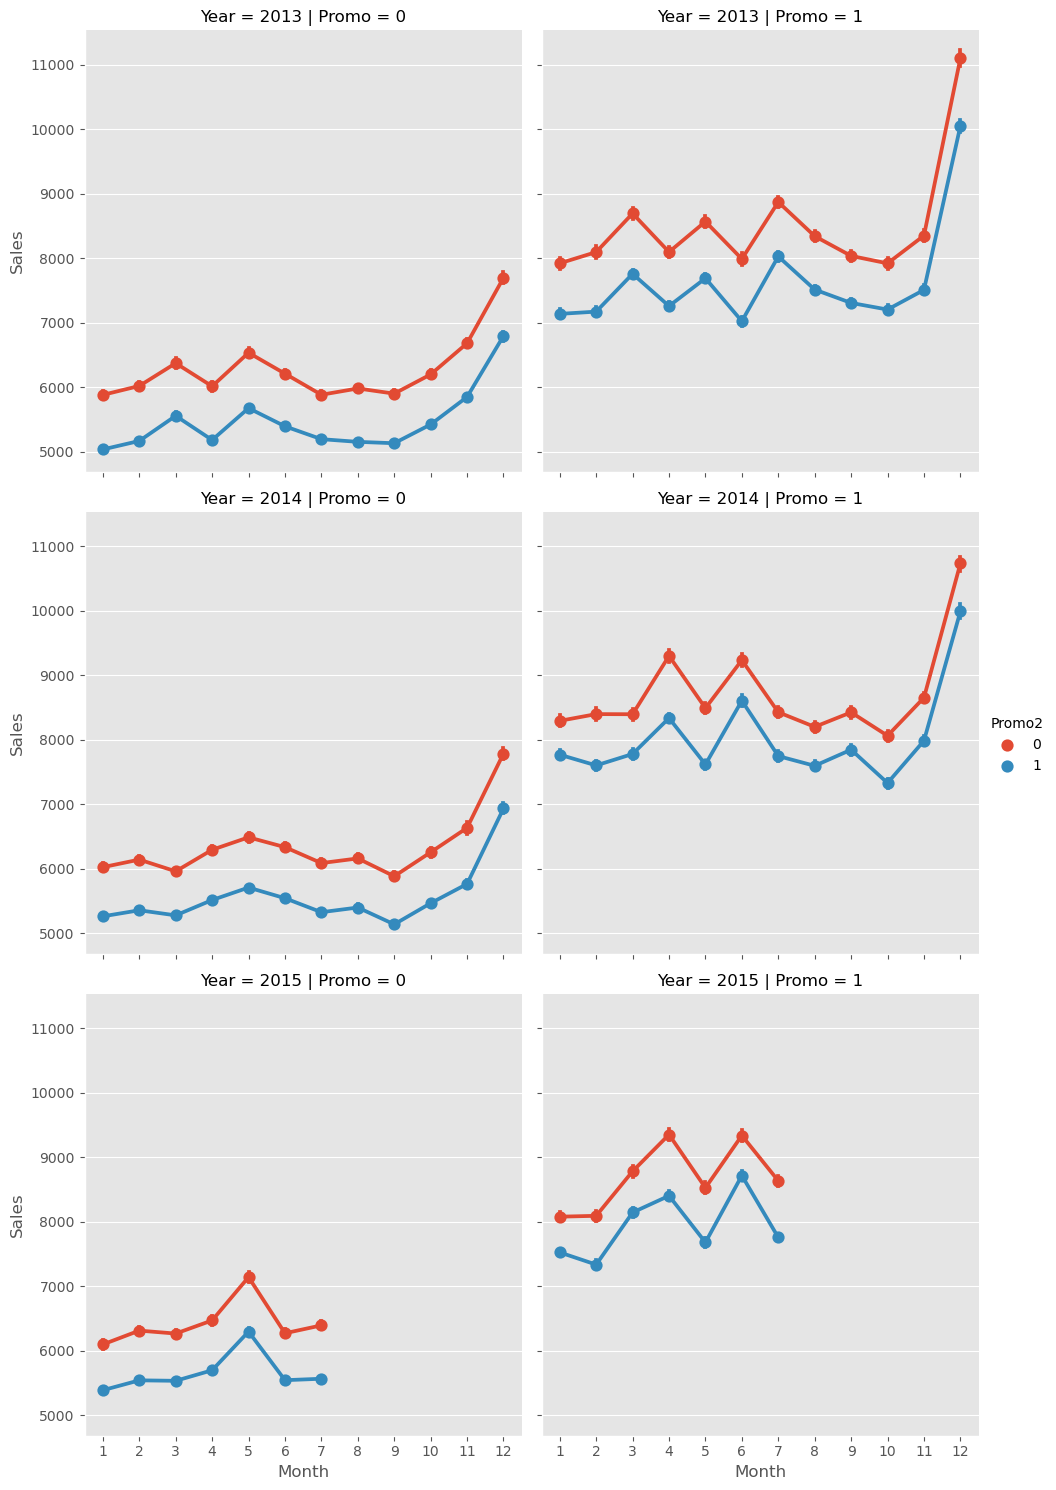

In [34]:
sns.catplot(
    data=train_store_df,
    x="Month",
    y="Sales",
    col='Promo',
    hue='Promo2',
    row="Year",
    kind='point'
)
plt.show()
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 

> Needless to say, when the stores were having promotions, the sales were higher. Overall, the store promotions sales (Promo) are also higher than the seasonality promotions (Promo2). There are some patterns of a yearly trend that occurred, such as store sales spike up in March and May. And the sales built up significantly at the end of the year. However, those trends are not consistent and fluctuate differently on year. Because of that, it could not actually be considered to be a distinct annual trend.

We want to explore the correlation between three attributes: Day of Week, Sales, and Promo.

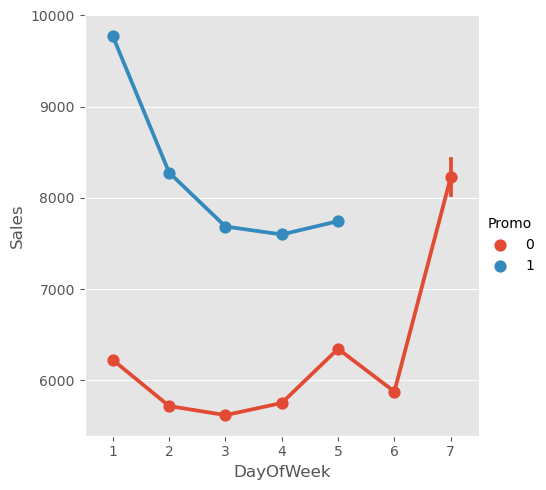

In [35]:
sns.catplot(data = train_store_df, x = "DayOfWeek", y = "Sales", hue = "Promo", kind='point')

In [36]:
print("There are", train_store_df[(train_store_df.Open == 1) & (train_store_df.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")    

There are 33 stores opend on sundays


> On the weekend there are no promotions, despite the fact that Sunday has the most sales over 62% of the time there are no promo campaign running. But on the other hand, the promotion runs on 38% of weekdays, which have Monday prove to be the most effective and gradually decline though out days later. 

### Question 4: Is there exist a trends on a yearly basis? How is that look like?

Let's see the trends on a yearly basis.

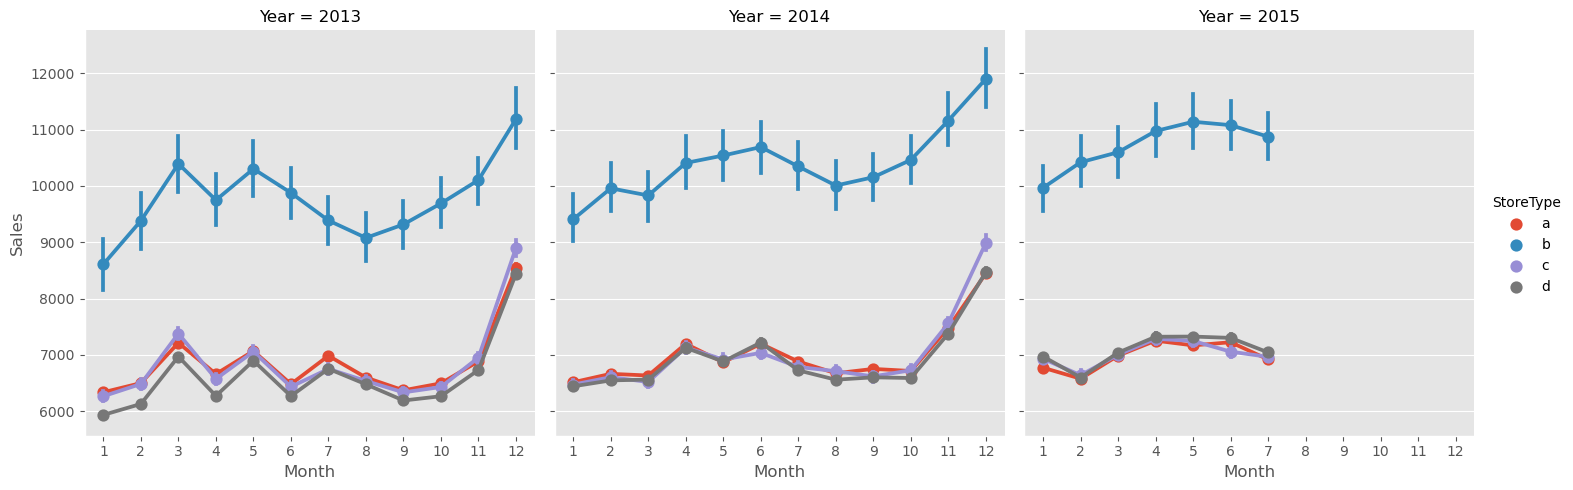

In [37]:
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly. 
sns.catplot(data = train_store_df, x = "Month", y = "Sales", col = "Year", hue = "StoreType", kind='point')

> We can observe a seasonality effect, but not trends. The sales stay constant yearly. The graph also illustrates the significant sales for StoreType B, which explain why StoreType B have the highest number on average sales and average customers

### Question 5: What about the Competition Distance and it kind of inpact does this have on the sales? 

The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.

In [38]:
train_store_df.CompetitionDistance.describe()
train_store_df["CompetitionDistance_Cat"] = pd.cut(train_store_df["CompetitionDistance"], 5)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\2045812575.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_store_df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13968\2045812575.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_store_df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])


<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

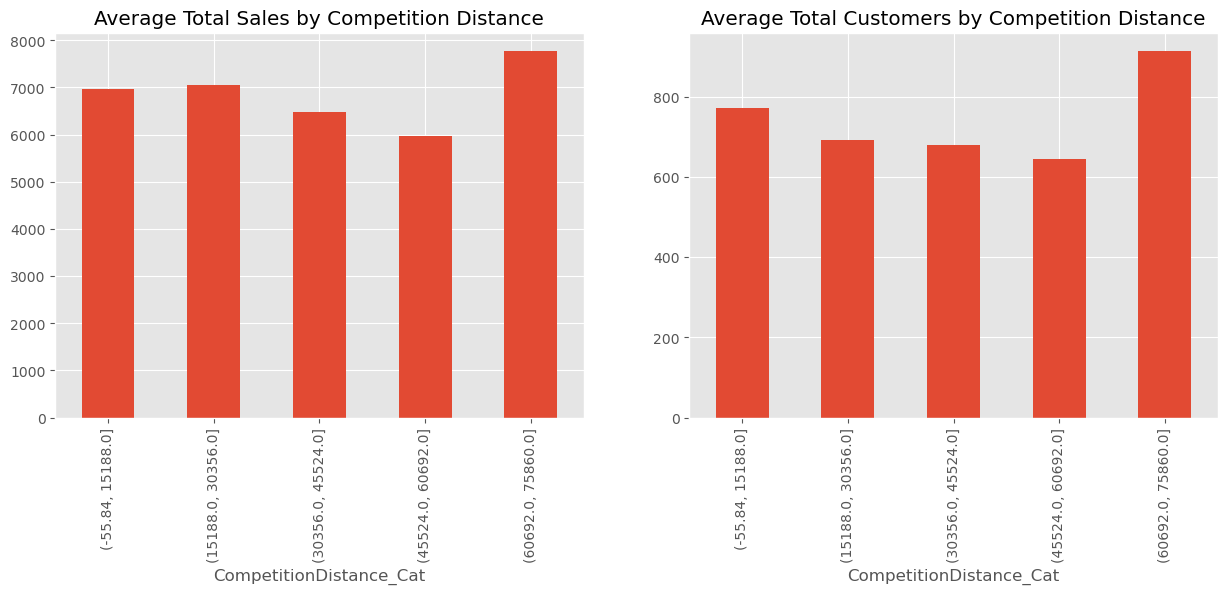

In [39]:
f, ax = plt.subplots(1,2, figsize = (15,5))

train_store_df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
train_store_df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

Naturally, if the competition is far away, the stores are performing better (sales and customers). But that just explains the last column of the chart. The first four columns are slightly counterintuitive when the farer the competitor, the less sales and customers the store has obtained. This could be interpreted by Game theory. According to the Nash equilibrium, the closer the competition is, the more attractive that location would bring to the customer, raise up the value for the whole area, which increase the value of self and unintended lift the value of your competition. When the distance is too high, the marginal surplus value for customers drops off due to travelling costs. Therefore, column five is rise up back to highest cause the region has been explicitly owned by the store.

Lets go with the correlation graph, heatmap to compare all attributes of the dataset

<Axes: >

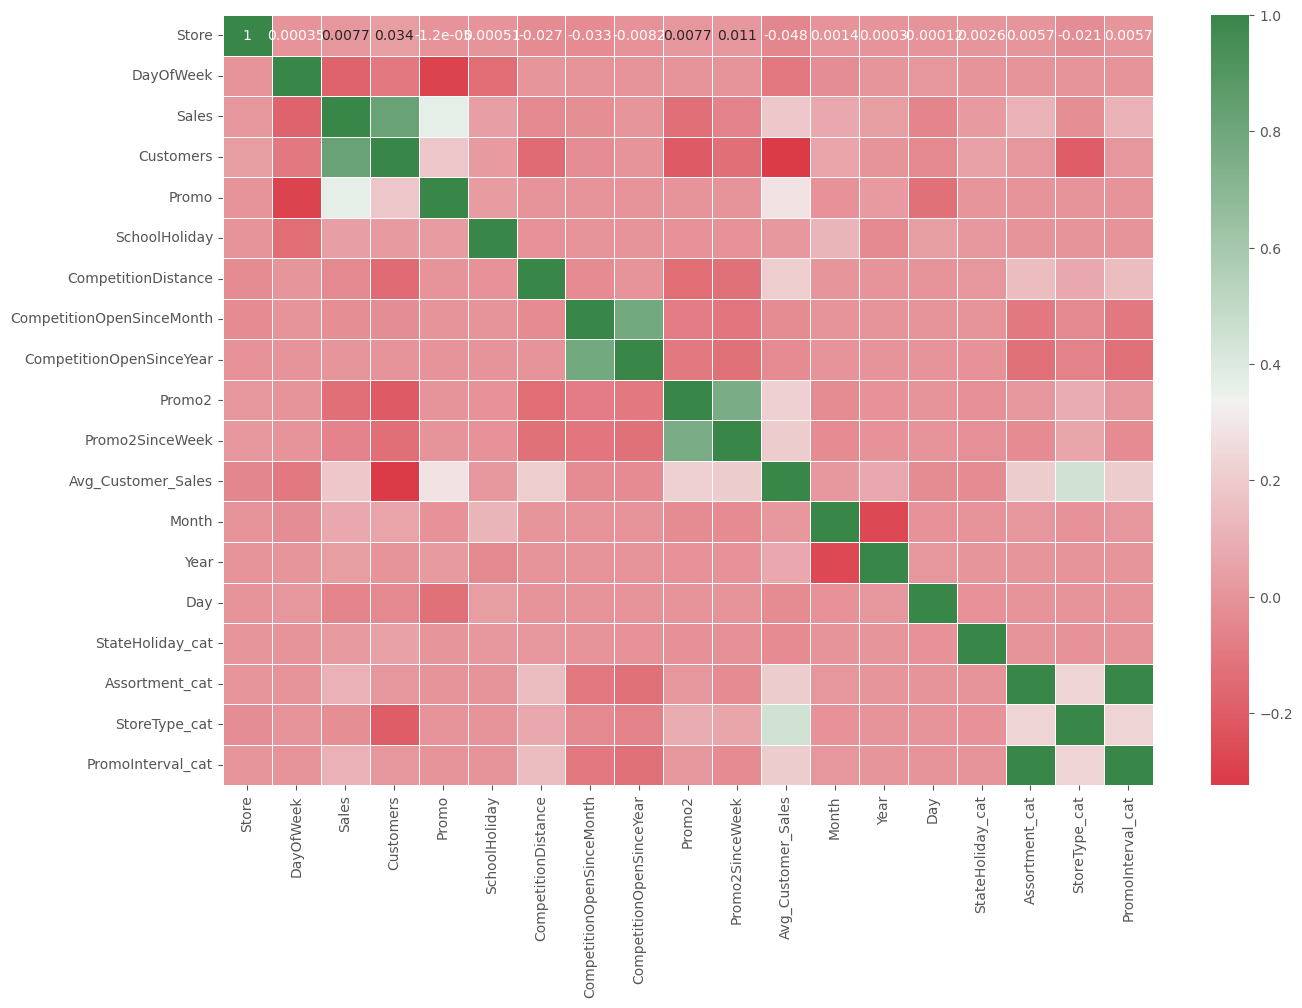

In [40]:
df_correlation = train_store_df[["Store", "DayOfWeek", "Sales", "Customers", "Promo", "SchoolHoliday", "CompetitionDistance", 
                                 "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2", "Promo2SinceWeek", "Avg_Customer_Sales", 
                                 "Month", "Year", "Day", "StateHoliday_cat", "Assortment_cat", "StoreType_cat", "PromoInterval_cat"]]


f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)


> The following correlations we could confirm from the graph above:
> - Customer vs Sales (0.82) – the most significant observed correlation.  
> - Promo vs Sales (0,37).
> - Avg_Customer_Sales vs Promo (0,28).
> - Avg_Customer_Sales vs Promo2 (0,22).
> - StoreType vs Avg_Customer_Sales (0,44).


### Conclusion:
> After executing an Exploratory Data Analysis on the dataset, we come to some conclusion:
> - StoreType A has the most sales and customers.
> - StoreType D had the highest buyer shopping cart.
> - Promo runs only on weekdays.
> - Promo2 doesn’t seem to be correlated to any significant change in the sales amount.
> - Customers tend to buy more on Monday, when there's promotion running (Promo) and on Sundays, when there is no promotion at all. 
> - Sales and customers have a very strong co-relation with a factor of 0.82. StoreType and Average Customer Sales also have a strong correlation at 0.44, which explains the exceptional sales of store type B compared to others. For other variables, it is insignificant.
> - Competition does not seem to have any correlations against sales. School and State holiday do not seem to impact sales
> - At this point, no distinct yearly trends have been observed. Only seasonal patterns.
atterns.


# Section 4: Data Modeling and Visualzation

# 4. Model and Visualize

## ARIMA Forecasting

In [41]:
ts = train_store_df
ts.drop(columns=['StoreType', 'Assortment', 'PromoInterval', 'CompetitionDistance_Cat'], inplace=True)

Check whether we have stationary or non-stationary time series

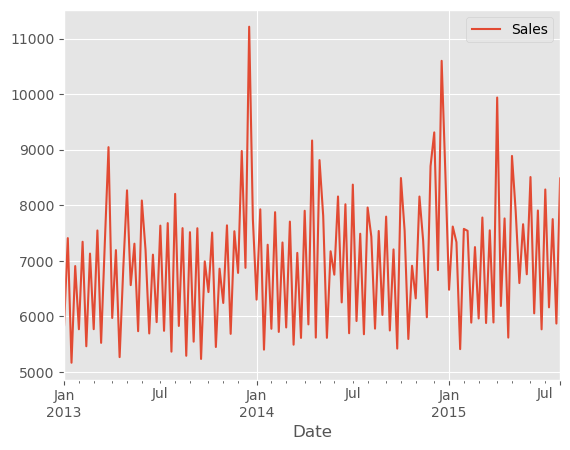

In [42]:
ts_arima = ts.set_index("Date").resample("W").mean()[["Sales"]]
ts_arima.plot()
plt.show()

In [43]:
# Let's see if we have stationary or non-stationary time series

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    """
    Tests the stationarity of a time series by plotting the rolling mean 
    and standard deviation.

    Parameters:
    timeseries (pd.Series): The time series data to be analyzed.

    The function calculates and plots the rolling mean and standard deviation 
    over a window of 12 time units to visually assess the stationarity.
    """
    
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

> The script doesn’t perform well, so we cannot check the critical value and test statistic. If the test statistic is greater than the critical value, then we cannot reject the null hypothesis, the series is stationary. That said it is still non-stationary. If we increase the i value in ARIMA model, perhaps above condition may meet and we may get the good forecast values.
> As we can see from the graph, we are dealing with a seasonal time series data. Therefore the right parameters are needed to be found for the ARIMA Model as ARIMA(p,d,q)(P,D,Q)s. Here (p,d,q) are the non-seasonal parameter, while (P,D,Q) follow the same definition, but are for the seasonal component of the series. The term s, is the periodicity (4 for the quarterly periods, 12 for yearly periods).

> - p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
> - d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
> - q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

Parameter combinations for Seasonal ARIMAX:

In [44]:
import warnings
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

# Let's begin by generating the various combination of parameters that we wish to assess:

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


> The return examples of parameter combinations for Seasonal ARIMAX

Let's iterate through some combinations of parameters and use the SARIMAX function to get the AIC Score. The lowest AIC value is the optimal option for our model

In [45]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2758.376473500445
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2442.271263557886
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2182.959421090318
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1929.3167714923839
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2203.743698132475
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2162.6354053663667
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1954.4352162224814
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1930.216116505248
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2668.7566203377846
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2344.2606694681554
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2157.1372845651736
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1901.4242538042101
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2198.555538245308
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2139.1230506209654
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1942.8377682353575
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1901.3130221467736
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2399.53422109695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2180.3374778671173


> After the function ran, it returned an abundance of AIC Score and the lowest one, which is the optimal parameter for our model: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1847.5087433770632

This is the optimal paramater for our model: ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1847.5087433770632

In [46]:
# model update with parameters

mod = sm.tsa.statespace.SARIMAX(ts_arima,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5577      0.090     -6.229      0.000      -0.733      -0.382
ma.L1         -0.7300      0.060    -12.221      0.000      -0.847      -0.613
ar.S.L12      -0.1579      0.133     -1.186      0.236      -0.419       0.103
ma.S.L12      -1.0328      0.663     -1.559      0.119      -2.331       0.266
sigma2      1.199e+06   8.76e+05      1.370      0.171   -5.17e+05    2.92e+06


Lets focus only on coef. This column shows the importance (weight) of each feature and how each one impacts the time series.
The P>|z| column informs us of the significance of each feature. Here, each weight has a p-value higher than 0,

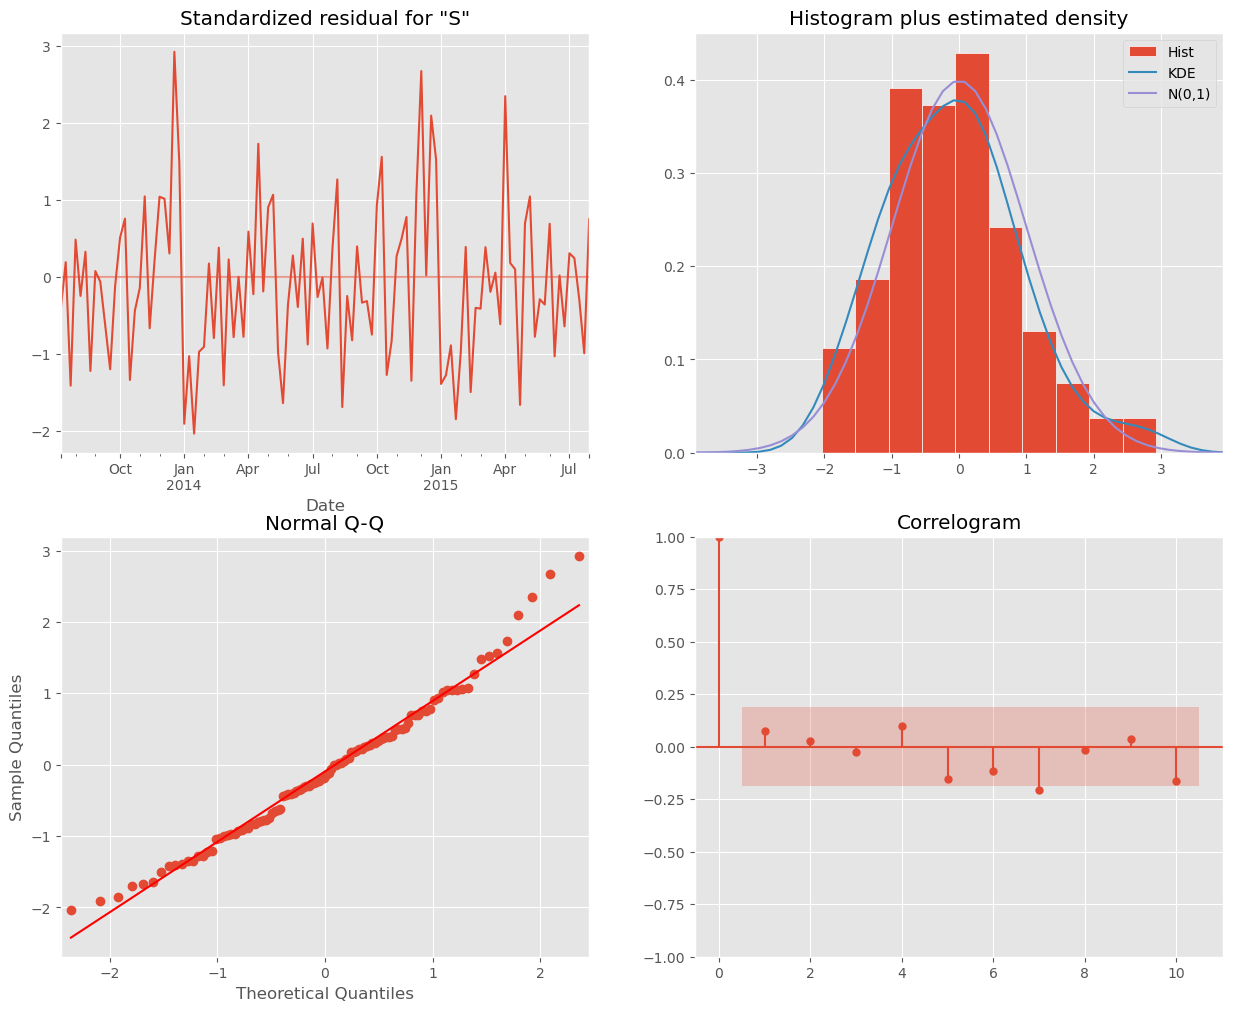

In [47]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

> Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.
In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:
> - In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
> - The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
> - The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.


Let’s go ahead with validating forecasts. We will start the fc to start from 1.11.2015. The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point. After showing the plot, we will exam it accuracy by comparing it with the data begin from 2015-01-01 and finally calculate the Root mean square for the final score comparation.

Error occurred during plotting: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types


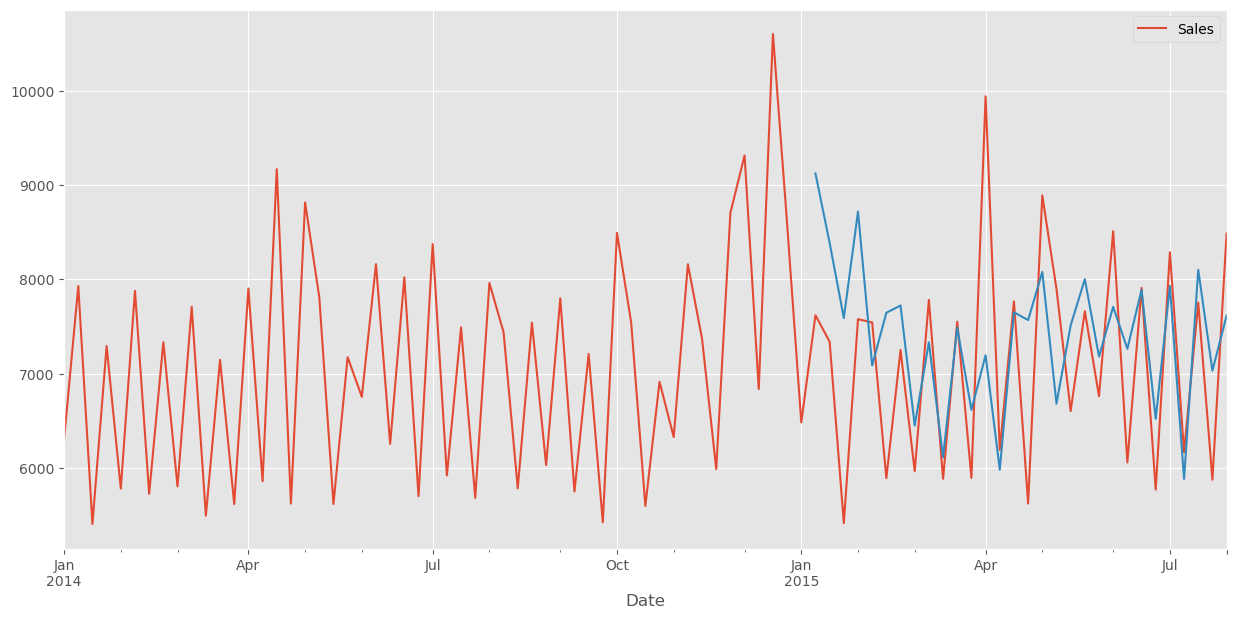

In [48]:
pred = results.get_prediction(start = pd.to_datetime("2015-01-11"), dynamic = False) 
# lets start the fc to start from 1.11.2015. 
# The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.
pred_ci = pred.conf_int() # Get confidence intervals of forecasts
# Assuming pred_ci is correctly calculated and has numeric values
# Example cleaning (ensure your data is properly cleaned before plotting)
pred_ci_cleaned = pred_ci.dropna()

# Plotting with error handling
try:
    ax = ts_arima["2014":].plot(label="observed", figsize=(15, 7))
    pred.predicted_mean.plot(ax=ax, label="One-step ahead FC", alpha=1)
    
    # Manually handle invalid values for fill_between
    valid_indices = np.isfinite(pred_ci_cleaned.iloc[:, 0]) & np.isfinite(pred_ci_cleaned.iloc[:, 1])
    ax.fill_between(pred_ci_cleaned.index[valid_indices],
                    pred_ci_cleaned.iloc[valid_indices, 0],
                    pred_ci_cleaned.iloc[valid_indices, 1],
                    color="k", alpha=0.05)
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Sales")
    plt.legend()
    plt.show()
    
    # Calculate RMSE for comparison
    ts_forecasted = pred.predicted_mean
    ts_truth = ts_arima["2015-01-11":]
    rms_arima = sqrt(mean_squared_error(ts_truth, ts_forecasted))
    print("RMS:", rms_arima)

except Exception as e:
    print(f"Error occurred during plotting: {str(e)}")

Now let calculate the RMS of ARIMA model

In [49]:
# Calculate the RMS of ARIMA model
ts_forecasted = pred.predicted_mean
ts_truth = ts_arima["2015-01-11":]
# calculate the Root mean square for final comparation
rms_arima = sqrt(mean_squared_error(ts_truth, ts_forecasted))
print("RMS:", rms_arima) 

RMS: 1060.2381261824844


> The RMS of ARIMA model is 1060.2381282406427. We will use this number to compare with other models to see which perform better

Now, we will forecast for the next few periods using the SARIMAX model that we have trained

Error occurred during plotting: name 'pred_uc' is not defined


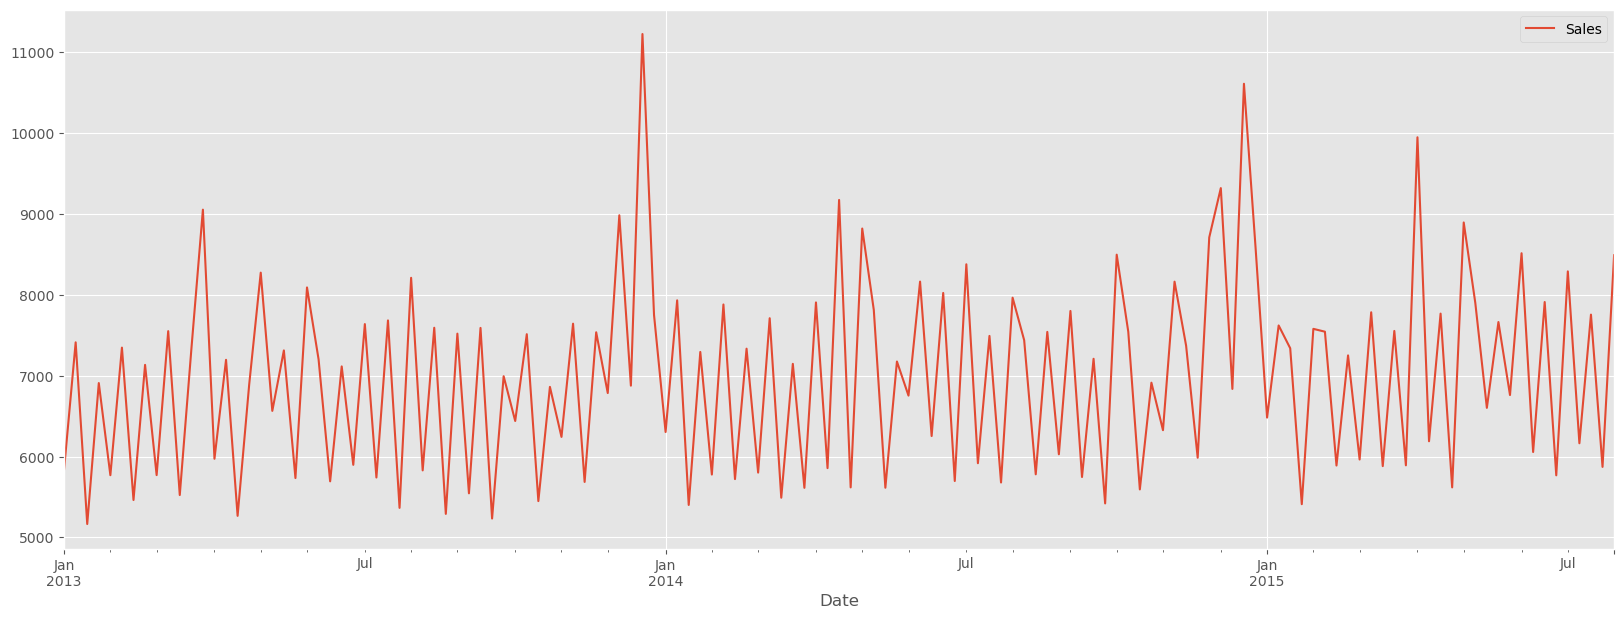

In [50]:
try:
    ax = ts_arima.plot(label="observed", figsize=(20, 7))
    pred_uc.predicted_mean.plot(ax=ax, label="Forecast")
    
    # Manually handle invalid values for fill_between
    valid_indices = np.isfinite(pred_ci.iloc[:, 0]) & np.isfinite(pred_ci.iloc[:, 1])
    ax.fill_between(pred_ci.index[valid_indices],
                    pred_ci.iloc[valid_indices, 0],
                    pred_ci.iloc[valid_indices, 1],
                    color="k", alpha=0.25)
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Sales")
    plt.legend()
    plt.show()

except Exception as e:
    print(f"Error occurred during plotting: {str(e)}")

> We could utilize this as a reference number for sales that the company make in the future.

## Random Forest Regression
Before we can start with fit and train our model, we need to do some feature engineering. The CompetitionOpenSinceMonth/Year variables have the same meaning. So let’s convert them into one variable that we call CompetitionOpenSince. It makes it easier for the algorithm to understand the pattern and creates less branches and thus complex trees.

We will drop a few variables, that either or not numeric or we don’t need them anymore. A new data frame will be created explicitly for this model.

In [51]:
train_store_df["CompetitionOpenSince"] = np.where((train_store_df["CompetitionOpenSinceMonth"] == 0) & (train_store_df["CompetitionOpenSinceYear"] == 0), 
                                                0,(train_store_df.Month - train_store_df.CompetitionOpenSinceMonth) + (12 *(train_store_df.Year - train_store_df.CompetitionOpenSinceYear)))

# lets drop the variables
train_store_df = train_store_df.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"], axis = 1)

In [52]:
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Store                 844392 non-null  int64         
 1   DayOfWeek             844392 non-null  int64         
 2   Date                  844392 non-null  datetime64[ns]
 3   Sales                 844392 non-null  int64         
 4   Customers             844392 non-null  int64         
 5   Open                  844392 non-null  int64         
 6   Promo                 844392 non-null  int64         
 7   SchoolHoliday         844392 non-null  int64         
 8   StateHoliday_cat      844392 non-null  float64       
 9   CompetitionDistance   844392 non-null  float64       
 10  Promo2                844392 non-null  int64         
 11  Promo2SinceWeek       844392 non-null  float64       
 12  Promo2SinceYear       844392 non-null  float64       
 13 

In [53]:
# create new dataframe
ts_rfr = train_store_df.copy()

Let's go ahead and develop the Model. We will call this the train_test_set which is divided into 80% of training and 20% of validation.

In [54]:
from sklearn import model_selection
from sklearn import metrics

features = ts_rfr.drop(["Customers", "Sales", "Avg_Customer_Sales"], axis = 1)
target = ts_rfr["Sales"]

X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, target, test_size = 0.20, random_state = 15) 
# We call here train_test_set which is  divided 80% and 20% validation
print(X_train.shape, X_train_test.shape, y_train.shape, y_train_test.shape)

(675513, 18) (168879, 18) (675513,) (168879,)


Now, we implement RandomForestRegressor. The model will calculate the Root mean square as we are using it to measure the efficiency of models

In [55]:
from sklearn.ensemble import RandomForestRegressor

X_train_common = X_train.select_dtypes(exclude=['datetime64'])
X_train_test_common = X_train_test[X_train_common.columns]

# Initialize and fit RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train_common, y_train)

# Predict on test set
yhat = rfr.predict(X_train_test_common)

# Calculate RMS
rms_rfr = sqrt(mean_squared_error(y_train_test, yhat))
print("RMS:", rms_rfr)

RMS: 978.1301977554394


The Model return the value of Root mean square is 976.7056123679898

In order to understand better what happened when we ran our randomforest regressor, here is a chart that represents, the importance and role that each variable that i decided to include played in this learning process:

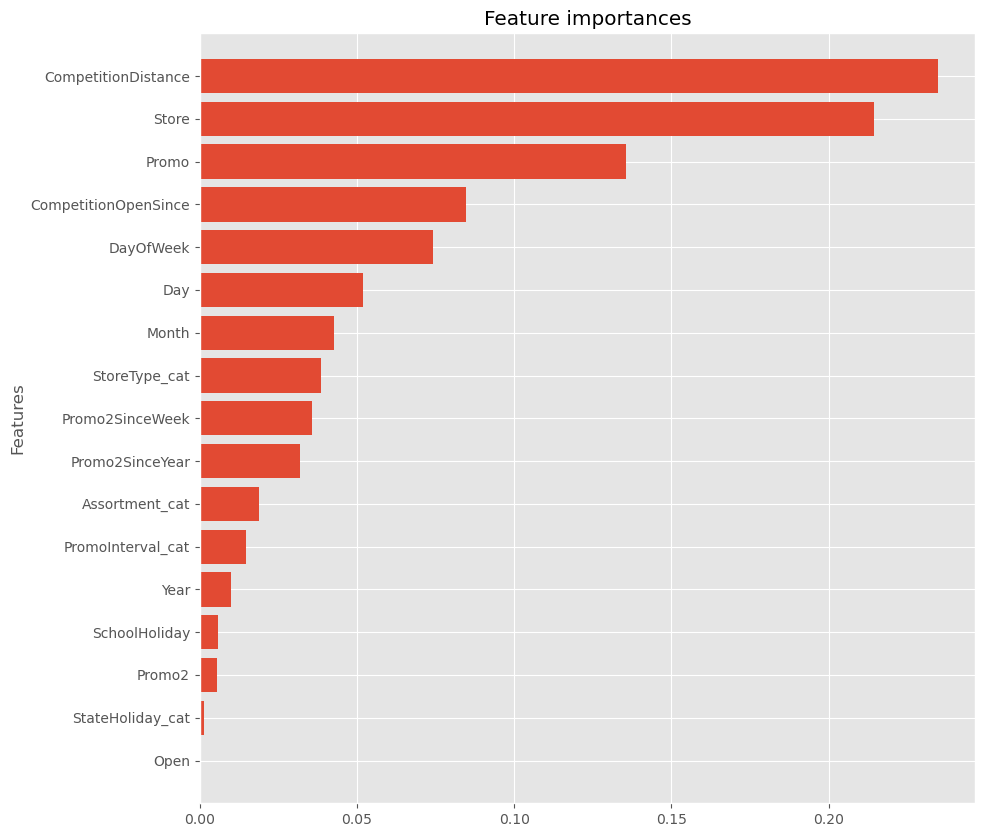

In [56]:
# Calculate feature importances
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)
palette1 = itertools.cycle(sns.color_palette())

# Store the feature ranking
features_ranked = [X_train_common.columns[idx] for idx in indices]

# Plot the feature importances
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.barh(range(X_train_common.shape[1]), importances[indices],
         color=[next(palette1)], align="center")
plt.yticks(range(X_train_common.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train_common.shape[1]])
plt.show()

> Top Features:
> - CompetitionDistance: Most influential, suggesting that the proximity of competitors greatly impacts sales.
> - Store: Indicates the specific store's impact on sales, possibly due to location or management.
> - Promo: Promotions significantly affect sales, as expected.
> Mid-Tier Features:
> - CompetitionOpenSince: The duration of competition presence is relevant.
> - DayOfWeek, Day, Month: Temporal factors play a significant role in sales variation.
> Lower Importance:
> - StoreType_cat, Promo2SinceWeek/Year: Store type and the start of secondary promotions have some influence but less compared to top features.
> - Assortment_cat, PromoInterval_cat: Product assortment and promo intervals have limited impact.
> Least Important:
> - Year, SchoolHoliday, Promo2, StateHoliday_cat, Open: These features have minimal influence, suggesting they may not be crucial for the model.
> **Conclusion**
> The model emphasizes competition and store-related factors, as well as promotions, highlighting their importance in sales prediction. Temporal variables also contribute, but holidays and specific promo types are less critical. This insight can guide feature selection and business strategies.s strategies.s strategies.

## XGBoost

First, we have to define two functions: Root mean squared percentage error and Root mean squared percentage error extreme. With two parameters for each function: y and yhat.

In [57]:
def rmspe(y, yhat):
    """
    Calculates the Root Mean Square Percentage Error (RMSPE) between the 
    actual and predicted values.

    Parameters:
    y (array-like): Actual values.
    yhat (array-like): Predicted values.

    Returns:
    float: The RMSPE value.
    """
    return np.sqrt(np.mean((yhat / y - 1) ** 2))

def rmspe_xg(yhat, y):
    """
    Computes the RMSPE for XGBoost predictions.

    Parameters:
    yhat (array-like): Predicted log-transformed values.
    y (xgboost.DMatrix): Actual log-transformed values in XGBoost DMatrix format.

    Returns:
    tuple: A string identifier and the RMSPE value.
    """
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y, yhat)

To use the XGBoost model, we first must install the module xgboost.

In [58]:
import sys
!{sys.executable} -m pip install xgboost

We define the parameters for the model with the instruction as follows. The maximum depth for a tree here is 10. Second parameter command model to use tree based models. Set the learning rate at 1. Activate the silent mode. Mode for linear regression. The number of boosting rounds is required at 100.

In [59]:
import xgboost as xgb
# Exclude datetime columns
X_train_common = X_train.select_dtypes(exclude=['datetime64'])
X_train_test_common = X_train_test[X_train_common.columns]

# Convert datetime columns if needed
# Example: X_train['Date'] = X_train['Date'].astype(int)  # Convert to Unix timestamp

# Define XGBoost parameters
param = {
    'max_depth': 10,
    'booster': 'gbtree',
    'eta': 1,
    'silent': 1,
    'objective': 'reg:linear'
}

num_round = 100

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_common, label=y_train)
dtest = xgb.DMatrix(X_train_test_common, label=y_train_test)

# Train XGBoost model
xgboost = xgb.train(param, dtrain, num_round, evals=[(dtrain, 'train'), (dtest, 'eval')],
                    early_stopping_rounds=100, verbose_eval=True)

# Make predictions
preds = xgboost.predict(dtest)

# Calculate RMS
rms_xgboost = sqrt(mean_squared_error(y_train_test, preds))
print("RMS:", rms_xgboost)

[0]	train-rmse:2178.34574	eval-rmse:2190.39264
[1]	train-rmse:2058.34517	eval-rmse:2080.39838
[2]	train-rmse:1691.28383	eval-rmse:1710.25957
[3]	train-rmse:1586.89091	eval-rmse:1608.86923
[4]	train-rmse:1451.21918	eval-rmse:1475.90850
[5]	train-rmse:1390.57102	eval-rmse:1419.20575
[6]	train-rmse:1318.16227	eval-rmse:1353.72246
[7]	train-rmse:1266.66342	eval-rmse:1306.48351
[8]	train-rmse:1180.46925	eval-rmse:1226.91114
[9]	train-rmse:1140.16038	eval-rmse:1191.53444
[10]	train-rmse:1114.72467	eval-rmse:1171.23067
[11]	train-rmse:1093.99666	eval-rmse:1153.20889
[12]	train-rmse:1059.45095	eval-rmse:1122.62025
[13]	train-rmse:1035.91648	eval-rmse:1102.84883
[14]	train-rmse:1006.53727	eval-rmse:1077.01098
[15]	train-rmse:987.47063	eval-rmse:1060.89669
[16]	train-rmse:968.01326	eval-rmse:1046.07448
[17]	train-rmse:951.49568	eval-rmse:1035.80743
[18]	train-rmse:941.87900	eval-rmse:1027.72310
[19]	train-rmse:931.55986	eval-rmse:1022.37223
[20]	train-rmse:914.21187	eval-rmse:1006.26443
[21]	tra

> After running for a while, we got the result back. With the optimize prediction the model give us: train-rmse:596.34412	eval-rmse:873.01143

Calculate RMS to compare with other models

In [60]:
rms_xgboost = sqrt(mean_squared_error(y_train_test, preds))
print("RMS:", rms_xgboost) 

RMS: 873.0114320856579


The Root mean square for XGBoost model is 873.0114320856579

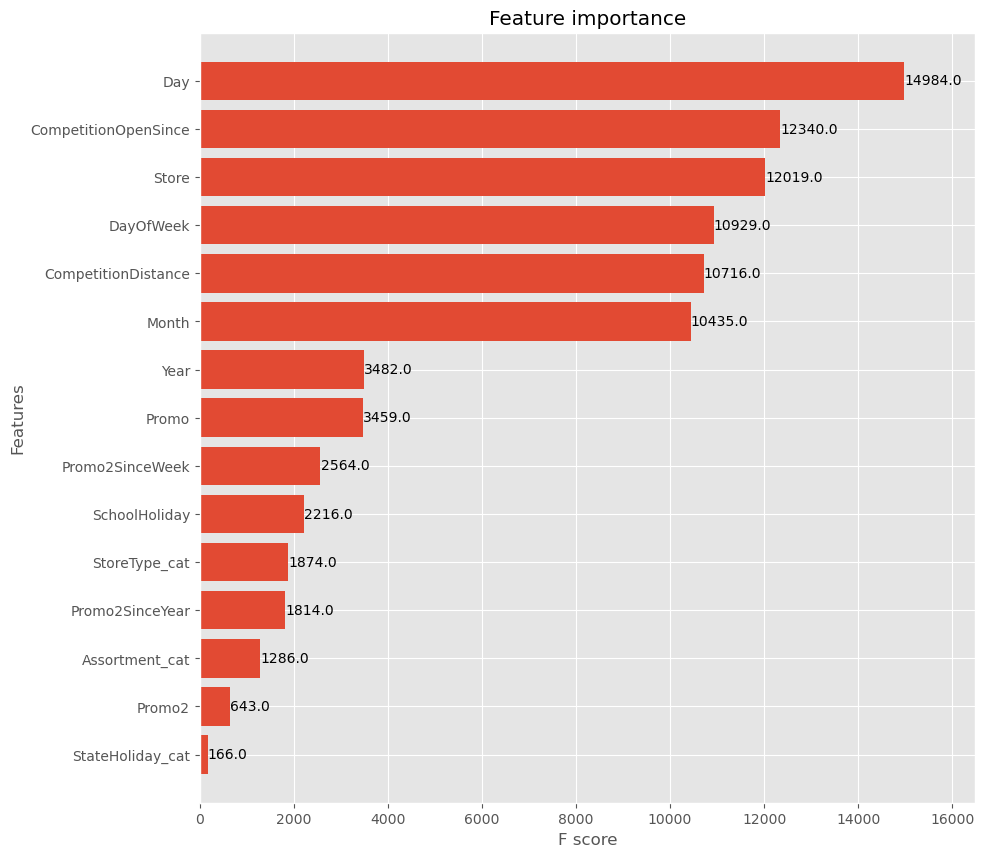

In [61]:
# Lets see the feature importance
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgboost, max_num_features=50, height=0.8, ax=ax)
plt.show()

> Top Features:
> - Day: The most important, indicating that daily variations significantly affect sales.
> - CompetitionOpenSince: Indicates that the length of time competitors have been open is crucial.
> - Store: Specific store characteristics significantly impact sales.
> Mid-Tier Features:
> - DayOfWeek: Weekly patterns are important, likely due to shopping behavior.
> - CompetitionDistance: Proximity to competitors influences sales, but less than the time they’ve been open.
> - Month: Monthly trends are also relevant.
> Lower Importance:
> - Year, Promo: Promotions and the year have a moderate impact.
> - Promo2SinceWeek, SchoolHoliday: These factors show some influence, though less critical.
> Least Important:
> - StoreType_cat, Promo2SinceYear, Assortment_cat: These categorical encodings and promo timings have less significance.
> - Promo2, StateHoliday_cat: These have the least impact, suggesting they are not key drivers of sales in the model.  
> **Conclusion**
> The XGBoost model emphasizes the importance of temporal factors, especially day and competition-related features. This insight can guide feature engineering and business strategies by focusing on day-to-day variations and the competitive landscape.

Table compare the RMS score of all models: 

# Section 5: Compare the models

In [64]:
print("now lets see the scores togher")

model_errors = pd.DataFrame({
    "Model": ["SARIMAX", "Random Forest Regression", "XGBoost"],
    "Score": [rms_arima, rms_rfr, rms_xgboost]
}) 

model_errors.sort_values(by = "Score", ascending = True)

now lets see the scores togher


,Model,Score
2,XGBoost,873.011432
1,Random Forest Regression,978.130198
0,SARIMAX,1060.238126


The XGBoost Model has come out on top with an significant different of 141.158365 point compared to the last model. Followed by Random Forest Regression and SARIMAX. 
As mentioned before, XGBoost is a faster algorithm when compared to other algorithms because of its parallel and distributed computing. XGBoost is developed with both deep considerations in terms of systems optimization and principles in machine learning. The goal of this library is to push the extreme of the computation limits of machines to provide a scalable, portable, and accurate library. Nowadays XGBoost is dominate structured or tabular datasets on classification and regression predictive modelling problems, which bring no surprise when it is obtain the best performance applying into the Time series of Rossman Store Sales dataset.
